**Import Required Libraries**

In [ ]:
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install numpy
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import os

**Read the csv File**

In [83]:
Forest=pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project2/Bird_Species_Observation/DataSet/CleanDataSet/Cleaned_Forest_DataSet.csv")
Grassland=pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project2/Bird_Species_Observation/DataSet/CleanDataSet/Cleaned_Grassland_DataSet.csv")

In [84]:
Forest.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [85]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

+  Verifying DataType for Date & timestamp Column:

In [86]:
Forest[['Start_Time', 'End_Time','Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Start_Time  8546 non-null   object
 1   End_Time    8546 non-null   object
 2   Date        8546 non-null   object
dtypes: object(3)
memory usage: 200.4+ KB


- Doing the datatype conversion Date and Timestamp Column:

In [87]:
# Step 1: Convert 'Date' to datetime
Forest['Date'] = pd.to_datetime(Forest['Date'], errors='coerce')

# Step 2: Convert 'Start_Time' and 'End_Time' to time
Forest['Start_Time'] = pd.to_datetime(Forest['Start_Time'], format='%H:%M:%S', errors='coerce').dt.time
Forest['End_Time'] = pd.to_datetime(Forest['End_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Step 3: Combine 'Date' and 'Start_Time' / 'End_Time' into timestamps
Forest['Start_Timestamp'] = pd.to_datetime(Forest['Date'].astype(str) + ' ' + Forest['Start_Time'].astype(str), errors='coerce')
Forest['End_Timestamp'] = pd.to_datetime(Forest['Date'].astype(str) + ' ' + Forest['End_Time'].astype(str), errors='coerce')

# Step 4: Extract hours
Forest['Start_Hour'] = Forest['Start_Timestamp'].dt.hour
Forest['End_Hour'] = Forest['End_Timestamp'].dt.hour

#Step 5: extract just the time portion (like 06:19:00) from your Start_Timestamp column
Forest['Start_Time_Only'] = Forest['Start_Timestamp'].dt.strftime('%H:%M:%S')
Forest['End_Time_Only'] = Forest['End_Timestamp'].dt.strftime('%H:%M:%S')

# Subtract timestamps to get duration
Forest['Duration'] = Forest['End_Timestamp'] - Forest['Start_Timestamp']

# Convert to hours as float
Forest['Duration_Hours'] = Forest['Duration'].dt.total_seconds() / 3600

Forest.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Start_Timestamp,End_Timestamp,Start_Hour,End_Hour,Start_Time_Only,End_Time_Only,Duration,Duration_Hours
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667


In [88]:
Forest[['Start_Time', 'End_Time','Date','Start_Timestamp','End_Timestamp','Duration','Duration_Hours',
        'Start_Hour','End_Hour','Start_Time_Only','End_Time_Only']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Start_Time       8546 non-null   object         
 1   End_Time         8546 non-null   object         
 2   Date             8546 non-null   datetime64[ns] 
 3   Start_Timestamp  8546 non-null   datetime64[ns] 
 4   End_Timestamp    8546 non-null   datetime64[ns] 
 5   Duration         8546 non-null   timedelta64[ns]
 6   Duration_Hours   8546 non-null   float64        
 7   Start_Hour       8546 non-null   int32          
 8   End_Hour         8546 non-null   int32          
 9   Start_Time_Only  8546 non-null   object         
 10  End_Time_Only    8546 non-null   object         
dtypes: datetime64[ns](3), float64(1), int32(2), object(4), timedelta64[ns](1)
memory usage: 667.8+ KB


- Splitting Month, Date, WeekDay Names, Weeks:

In [89]:
Forest['Month']  = pd.DatetimeIndex(Forest.Date).month #We are splitting month only

Forest['Dates']  = pd.DatetimeIndex(Forest.Date).day #We are splitting date only

Forest['WeekDay_Name'] = pd.DatetimeIndex(Forest.Date).day_name()

Forest['iso'] = Forest.Date.dt.isocalendar().week # It will give wether it is first week or second week

Forest.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Start_Timestamp,End_Timestamp,Start_Hour,End_Hour,Start_Time_Only,End_Time_Only,Duration,Duration_Hours,Month,Dates,WeekDay_Name,iso
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21


- Converting months to seasons:

In [90]:
# Optional: Map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

Forest['Season'] = Forest['Month'].apply(month_to_season)
Forest.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Start_Timestamp,End_Timestamp,Start_Hour,End_Hour,Start_Time_Only,End_Time_Only,Duration,Duration_Hours,Month,Dates,WeekDay_Name,iso,Season
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring


- Unique Observers

In [91]:
Observers = pd.DataFrame(Forest['Observer'].unique(), columns=['Observer'])
Observers

,Observer
0,Elizabeth Oswald
1,Kimberly Serno
2,Brian Swimelar


- Number of Visits by Each Observer

In [92]:
observer_counts = Forest['Observer'].value_counts().reset_index(name = 'Visits')
observer_counts

,Observer,Visits
0,Elizabeth Oswald,3285
1,Kimberly Serno,2910
2,Brian Swimelar,2351


C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\1093281217.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




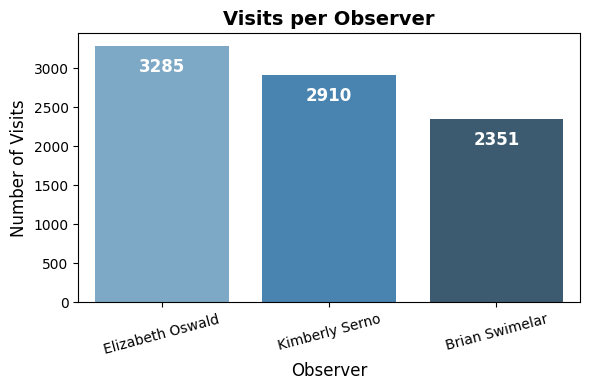

In [93]:
# Plot
plt.figure(figsize=(6, 4))
# Get a color palette from seaborn

ax = sns.barplot(data=observer_counts, x='Observer', y='Visits', palette='Blues_d')

# Add text inside bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height - 150,  # slightly below the top
        f'{int(height)}',
        ha='center',
        va='top',
        color='white',
        fontweight='bold',
        fontsize=12
    )

# Styling
plt.title('Visits per Observer', fontsize=14, fontweight='bold')
plt.xlabel('Observer', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

- Seasonal Visit Trends by Observer

In [94]:
# Aggregate bird sightings counts by Season and Year
seasonal_trends = Forest.groupby(['Year', 'Season','Observer']).size().reset_index(name='Visit')
seasonal_trends

,Year,Season,Observer,Visit
0,2018,Spring,Brian Swimelar,601
1,2018,Spring,Elizabeth Oswald,936
2,2018,Spring,Kimberly Serno,853
3,2018,Summer,Brian Swimelar,1750
4,2018,Summer,Elizabeth Oswald,2349
5,2018,Summer,Kimberly Serno,2057


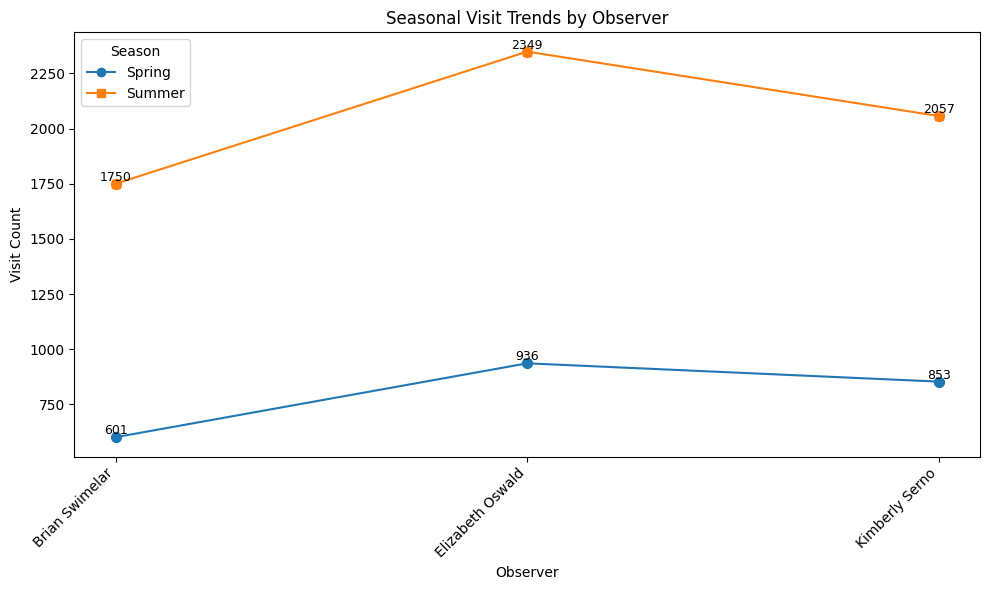

In [95]:
markers = {'Spring': 'o', 'Summer': 's'}

observers = seasonal_trends['Observer'].unique()
x_pos = np.arange(len(observers))

plt.figure(figsize=(10,6))

for season in seasonal_trends['Season'].unique():
    season_data = seasonal_trends[seasonal_trends['Season'] == season]
    y = []
    for obs in observers:
        visit = season_data[season_data['Observer'] == obs]['Visit']
        y.append(visit.values[0] if not visit.empty else np.nan)
    
    plt.plot(x_pos, y, marker=markers.get(season, 'o'), label=season)
    plt.scatter(x_pos, y, s=50)

    # Add labels for each data point
    for i, value in enumerate(y):
        if not np.isnan(value):
            plt.text(x_pos[i], value, str(value), fontsize=9, ha='center', va='bottom')

plt.xticks(x_pos, observers, rotation=45, ha='right')
plt.xlabel('Observer')
plt.ylabel('Visit Count')
plt.title('Seasonal Visit Trends by Observer')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

- Weekly Visit Counts by Observer

In [96]:
# Group by Observer and Weekday, then count
weekday_visits = Forest.groupby(['Observer', 'WeekDay_Name']).size().reset_index(name='Visit')
weekday_visits

,Observer,WeekDay_Name,Visit
0,Brian Swimelar,Friday,259
1,Brian Swimelar,Monday,386
2,Brian Swimelar,Saturday,298
3,Brian Swimelar,Sunday,243
4,Brian Swimelar,Thursday,403
5,Brian Swimelar,Tuesday,364
6,Brian Swimelar,Wednesday,398
7,Elizabeth Oswald,Friday,442
8,Elizabeth Oswald,Monday,415
9,Elizabeth Oswald,Saturday,474


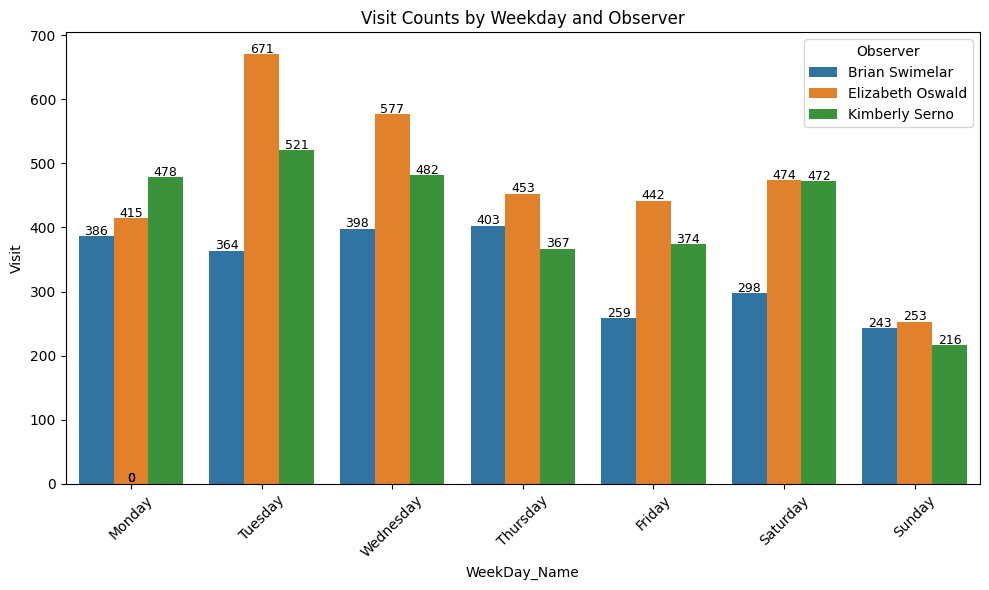

In [97]:
# Optional: order weekdays properly
natural_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_visits['WeekDay_Name'] = pd.Categorical(weekday_visits['WeekDay_Name'], categories=natural_order, ordered=True)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='WeekDay_Name', y='Visit', hue='Observer', data=weekday_visits)

# Loop over each bar and add the visit count on top
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 2,                     # y-position (slightly above the bar)
        int(height),                    # label text (visit count)
        ha='center',
        fontsize=9,
        color='black'
    )

plt.xticks(rotation=45)
plt.title('Visit Counts by Weekday and Observer')
plt.tight_layout()
plt.show()

- Weekly Visit Counts by Each Observer

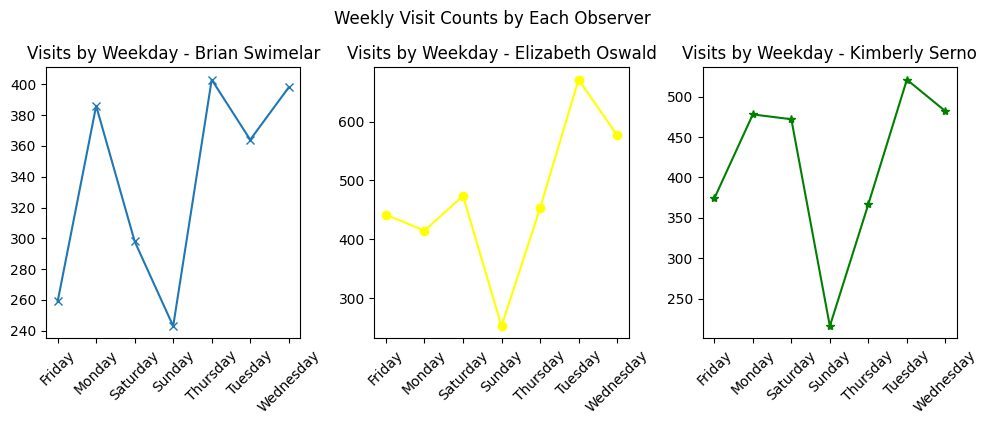

In [98]:
plt.figure(figsize=(10, 4))




plt.subplot(1,3,1)  # (row, columns, position)

# Select data for one observer, e.g. Brian Swimelar
obs_data = weekday_visits[weekday_visits['Observer'] == 'Brian Swimelar']
obs_data

observer_name = obs_data['Observer'].iloc[0]
plt.plot(obs_data['WeekDay_Name'], obs_data['Visit'], marker = 'x')
plt.xticks(rotation=45)
plt.title(f"Visits by Weekday - {observer_name}")





plt.subplot(1,3,2)  # (row, columns, position)

# Select data for one observer, e.g. Elizabeth Oswald
obs_data1 = weekday_visits[weekday_visits['Observer'] == 'Elizabeth Oswald']
# obs_data1

observer_name = obs_data1['Observer'].iloc[0]
plt.plot(obs_data1['WeekDay_Name'], obs_data1['Visit'],color='yellow', marker = 'o')
plt.xticks(rotation=45)
plt.title(f"Visits by Weekday - {observer_name}")



plt.subplot(1,3,3)  # (row, columns, position)

# Select data for one observer, e.g. Kimberly Serno
obs_data1 = weekday_visits[weekday_visits['Observer'] == 'Kimberly Serno']
# obs_data1

observer_name = obs_data1['Observer'].iloc[0]
plt.plot(obs_data1['WeekDay_Name'], obs_data1['Visit'],color='green', marker = '*')
plt.xticks(rotation=45)
plt.title(f"Visits by Weekday - {observer_name}")


plt.tight_layout()
plt.suptitle("Weekly Visit Counts by Each Observer ", y=1.05)
plt.show()

- No.Of.Visit Counts by Weekdays

C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\1807376575.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\1807376575.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




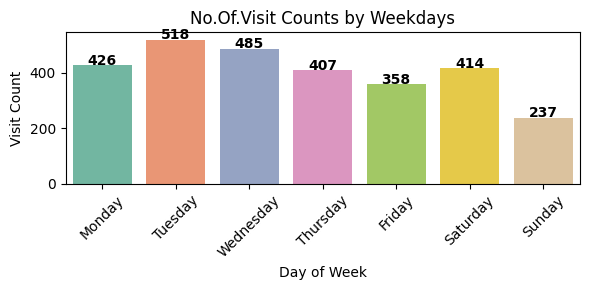

In [99]:
natural_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Only include weekdays that exist in your data, but keep Monday first
weekday_order = [day for day in natural_order if day in weekday_visits['WeekDay_Name'].unique()]

weekday_visits['WeekDay_Name'] = pd.Categorical(
    weekday_visits['WeekDay_Name'],
    categories=weekday_order,
    ordered=True
)
plt.figure(figsize=(6,3))

ax = sns.barplot(x='WeekDay_Name', y='Visit', data=weekday_visits, palette='Set2',ci=None )

# Loop over each bar and add the visit count on top
for p in ax.patches:
    height = p.get_height()
    ax.text(
    p.get_x() + p.get_width() / 2,
    height + 2,
    int(height),
    ha='center',
    fontsize=10,
    fontweight='bold',
    color='black'
)


plt.xlabel('Day of Week')
plt.ylabel('Visit Count')
plt.title('No.Of.Visit Counts by Weekdays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Top Weekday with Maximum Visits per Observer

In [100]:
# Find the index of the max visit for each observer
max_idx = weekday_visits.groupby('Observer')['Visit'].idxmax() # to find the row number (index) of the row that has the highest Visit count for each person.
# max_idx

# Use those indices to get the top rows
top_weekday_per_observer = weekday_visits.loc[max_idx].reset_index(drop=True) #Drop = True ,The old index is gone, and new default index (0, 1) is used

top_weekday_per_observer

,Observer,WeekDay_Name,Visit
0,Brian Swimelar,Thursday,403
1,Elizabeth Oswald,Tuesday,671
2,Kimberly Serno,Tuesday,521


**1. Temporal Analysis:**

> *Seasonal Trends: Analyze the Date and Year columns to detect patterns in bird sightings across different seasons or years?*

- Seasonal Visit Trends by Year & Seasons:

In [101]:
seasonal_trends = Forest.groupby(['Year', 'Season']).size().reset_index(name='Visit')
seasonal_trends

,Year,Season,Visit
0,2018,Spring,2390
1,2018,Summer,6156


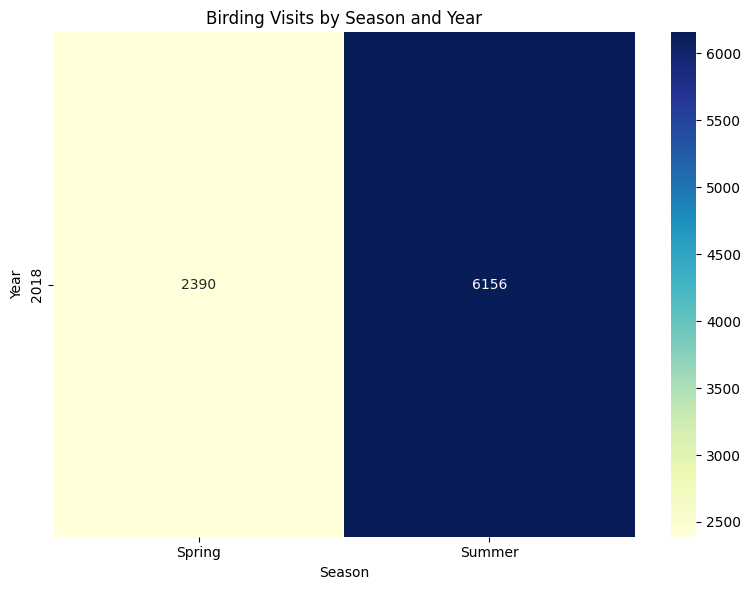

In [102]:
# Pivot table: rows = Year, columns = Season
heatmap_data = seasonal_trends.pivot(index='Year', columns='Season', values='Visit')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Birding Visits by Season and Year')
plt.xlabel('Season')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

> *Observation Time: Study the Start_Time and End_Time to determine if specific time windows correlate with higher bird activity?*

- Start_Hour_Count

In [103]:
Start_Hour_Count = Forest["Start_Hour"].value_counts().sort_index()
Start_Hour_Count

Start_Hour
5      634
6     2289
7     2331
8     1920
9      979
10     393
Name: count, dtype: int64

- End_Hour_Count

In [104]:
End_Hour_Count = Forest["End_Hour"].value_counts().sort_index()
End_Hour_Count

End_Hour
5      316
6     2211
7     2349
8     1978
9     1199
10     493
Name: count, dtype: int64

- hour_range

In [105]:
# hour_range = (Start_Hour_Count.index).union(End_Hour_Count.index)
# hour_range

# hour_range = set(Start_Hour_Count.index).union(End_Hour_Count.index)
# hour_range

hour_range = sorted(set(Start_Hour_Count.index).union(End_Hour_Count.index))
hour_range

[5, 6, 7, 8, 9, 10]

-  Combine the counts into a single DataFrame for easy plotting

In [106]:
# Combine the counts into a single DataFrame for easy plotting
df = pd.DataFrame({
    'Start_Hour_Count': Start_Hour_Count,
    'End_Hour_Count': End_Hour_Count
}, index=hour_range).fillna(0)

df

,Start_Hour_Count,End_Hour_Count
5,634,316
6,2289,2211
7,2331,2349
8,1920,1978
9,979,1199
10,393,493


In [107]:
# Format hours into "5AM", "6AM", ..., "5PM", etc.
formatted_hours = [f"{(h % 12) or 12}{'AM' if h < 12 else 'PM'}" for h in df.index] #h % 12: Converts 13 → 1, 14 → 2, ..., 23 → 11, and 0 → 0 or 12: Fixes the case for midnight (0) — because 0 % 12 gives 0, we use or 12 to make it 12
formatted_hours

['5AM', '6AM', '7AM', '8AM', '9AM', '10AM']

- Plotting

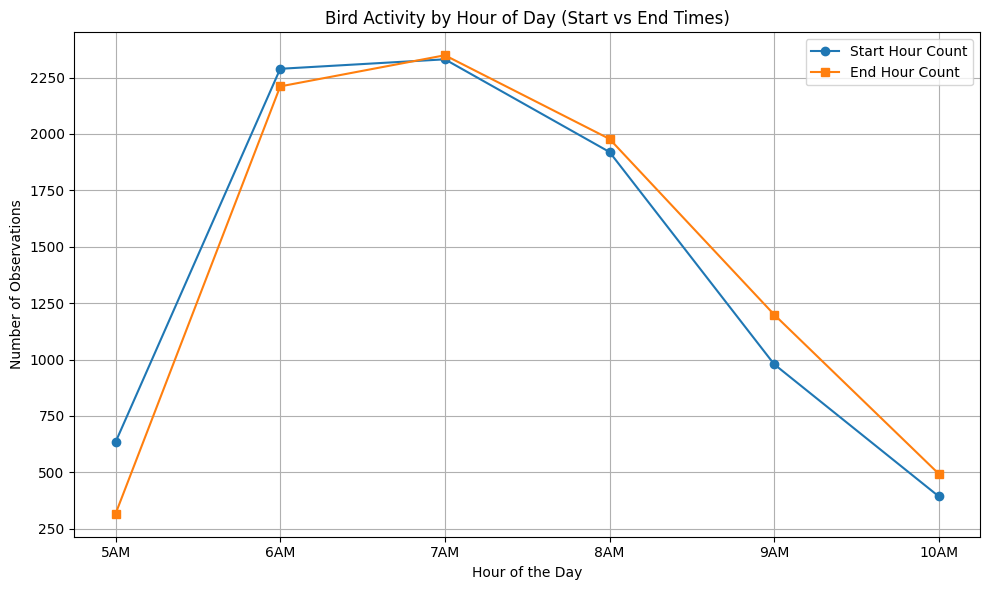

In [108]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(formatted_hours, df['Start_Hour_Count'], marker='o', label='Start Hour Count')
plt.plot(formatted_hours, df['End_Hour_Count'], marker='s', label='End Hour Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Observations')
plt.title('Bird Activity by Hour of Day (Start vs End Times)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Total Observation Time by Observer:

In [109]:
# Group by Observer and sum the durations to get total time spent per observer
observer_duration = Forest.groupby('Observer')['Duration_Hours'].sum().sort_values(ascending=False)

# Convert to DataFrame and rename the column
observer_duration_df = observer_duration.reset_index().rename(columns={'Duration_Hours': 'Total_Duration_Hours'})

# Display the total hours each observer spent
observer_duration_df

,Observer,Total_Duration_Hours
0,Elizabeth Oswald,560.833333
1,Kimberly Serno,485.000000
2,Brian Swimelar,397.150000


In [110]:
fig = go.Figure(go.Pie(
    labels=observer_duration_df['Observer'],
    values=observer_duration_df['Total_Duration_Hours'],
    hole=0.8
))

fig.update_layout(
    title_text='Total Observation Time by Observer',
    title_x=0.5  # center align
)

fig.show()

- - -

**2.	Spatial Analysis:**

> *Location Insights: Group data by Location_Type (e.g., Forest) to identify biodiversity hotspots?*

In [111]:
# Group by Location_Type and count unique species
biodiversity_hotspots = Forest.groupby('Location_Type')['Common_Name'].nunique().reset_index()
# biodiversity_hotspots

# Rename the column for clarity
biodiversity_hotspots.columns = ['Location_Type', 'Unique_Species_Count']
biodiversity_hotspots

,Location_Type,Unique_Species_Count
0,Forest,108


- Unique Species Count by Location Type and Season:

In [112]:
Forest['Season'].unique()

array(['Spring', 'Summer'], dtype=object)

In [113]:
# Filter spring and summer data
spring_data = Forest[Forest['Season'] == 'Spring']
summer_data = Forest[Forest['Season'] == 'Summer']

# Group Spring data by Location_Type and count unique species
spring_hotspots = spring_data.groupby('Location_Type')['Common_Name'].nunique().reset_index()
spring_hotspots.columns = ['Location_Type', 'Spring_Unique_Species_Count']
# print(spring_hotspots)

# Group Summer data by Location_Type and count unique species (optional)
summer_hotspots = summer_data.groupby('Location_Type')['Common_Name'].nunique().reset_index()
summer_hotspots.columns = ['Location_Type', 'Summer_Unique_Species_Count']
# summer_hotspots

# Merge spring and summer into one table
combined_hotspots = pd.merge(spring_hotspots, summer_hotspots, on='Location_Type', how='outer')

# Display combined table
combined_hotspots

,Location_Type,Spring_Unique_Species_Count,Summer_Unique_Species_Count
0,Forest,94,91


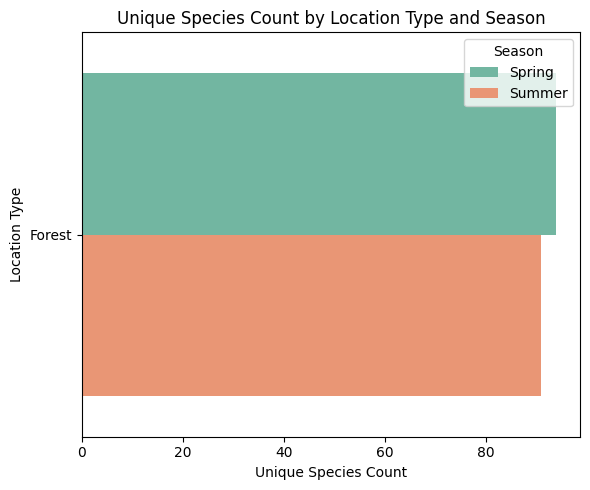

In [114]:
# Melt data to long format
melted = pd.melt(
    combined_hotspots,
    id_vars=['Location_Type'],
    value_vars=['Spring_Unique_Species_Count', 'Summer_Unique_Species_Count'],
    var_name='Season',
    value_name='Unique_Species_Count'
)

# Clean season names
melted['Season'] = melted['Season'].str.replace('_Unique_Species_Count', '')

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
sns.barplot(data=melted, y='Location_Type', x='Unique_Species_Count', hue='Season', palette='Set2')

plt.title('Unique Species Count by Location Type and Season')
plt.xlabel('Unique Species Count')
plt.ylabel('Location Type')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

- Rare Species Count by Location Type (PIF Watchlist):

In [115]:
# Identify rare species from PIF Watchlist
rare_species = Forest[Forest['PIF_Watchlist_Status'] == True]
rare_species.head()

# Count how many rare species observed per Location_Type
rare_by_location = rare_species.groupby('Location_Type')['Common_Name'].nunique().reset_index()
rare_by_location

rare_by_location.columns = ['Location_Type', 'Rare_Species_Count']
rare_by_location

,Location_Type,Rare_Species_Count
0,Forest,7


C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\2062331906.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




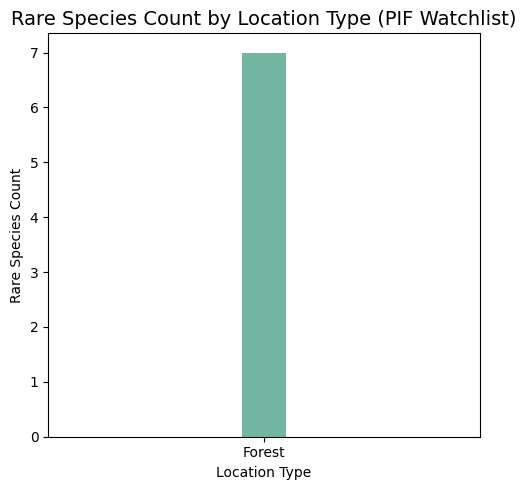

In [116]:
# Create bar plot
plt.figure(figsize=(5, 5))
sns.barplot(data=rare_by_location, x='Location_Type', y='Rare_Species_Count', palette='Set2', width = 0.1)

plt.title('Rare Species Count by Location Type (PIF Watchlist)', fontsize=14)
plt.xlabel('Location Type')
plt.ylabel('Rare Species Count')
plt.tight_layout()
plt.show()

> *Plot-Level Analysis: Compare observations across different Plot_Name to see which plots attract more species or specific kinds of birds?*

In [117]:
# Group by Plot_Name or Site_Name and count unique species
hotspots_by_plot = Forest.groupby('Plot_Name')['Common_Name'].nunique().reset_index()
hotspots_by_plot.columns = ['Plot_Name', 'Unique_Species_Count']
hotspots_by_plot = hotspots_by_plot.sort_values(by='Unique_Species_Count', ascending=False)

# hotspots_by_plot
print(hotspots_by_plot.head(10))  # Top 10 forest plots with most species


     Plot_Name  Unique_Species_Count
97   CHOH-0812                    26
248  NACE-0477                    23
58   CHOH-0002                    22
78   CHOH-0380                    22
73   CHOH-0262                    22
209  MANA-0240                    22
95   CHOH-0795                    22
250  NACE-0491                    21
96   CHOH-0806                    21
59   CHOH-0006                    20


C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\1755586882.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




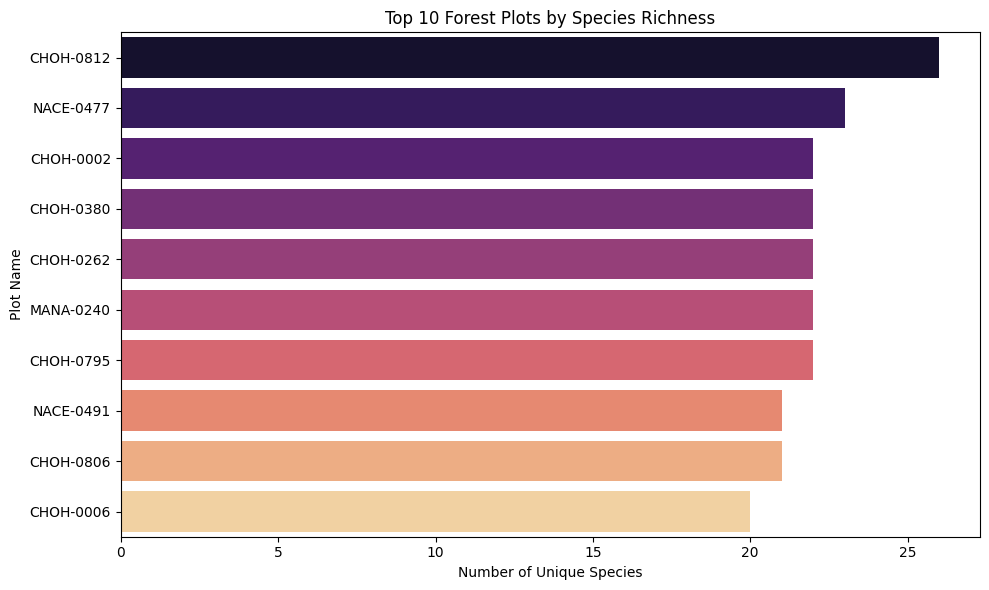

In [118]:
# Show top 10 plots only
top_hotspots = hotspots_by_plot.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_hotspots, x='Unique_Species_Count', y='Plot_Name', palette='magma')
plt.title('Top 10 Forest Plots by Species Richness')
plt.xlabel('Number of Unique Species')
plt.ylabel('Plot Name')
plt.tight_layout()
plt.show()

**3. Species Analysis:**

> *Diversity Metrics: Count unique species (Scientific_Name) observed and their distribution across Location_Type?*

In [119]:
# Group by Location_Type and count unique species by Scientific_Name
species_distribution = Forest.groupby('Location_Type')['Scientific_Name'].nunique()
# print(species_distribution,'\n')

species_distribution = Forest.groupby('Location_Type')['Scientific_Name'].nunique().reset_index()
# print(species_distribution,'\n')

# Rename columns for clarity
species_distribution.columns = ['Location_Type', 'Unique_Species_Count']
species_distribution

,Location_Type,Unique_Species_Count
0,Forest,108


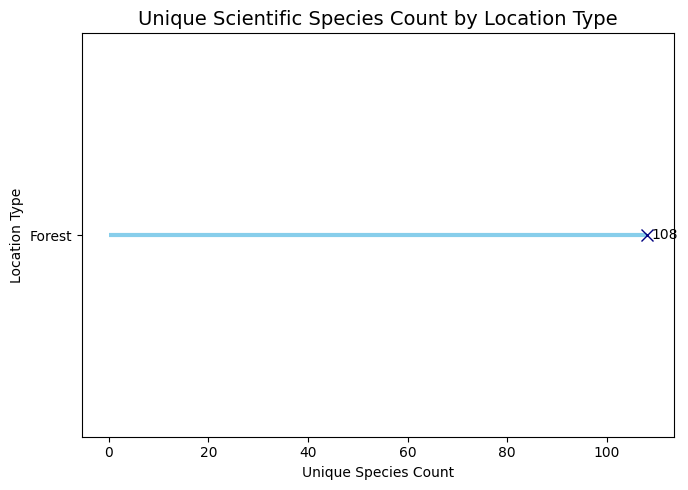

In [120]:
# Sort values for cleaner plot
species_distribution_sorted = species_distribution.sort_values(by='Unique_Species_Count', ascending=True)

plt.figure(figsize=(7, 5))
plt.hlines(y=species_distribution['Location_Type'], 
           xmin=0,
           xmax=species_distribution_sorted['Unique_Species_Count'], 
           color='skyblue', linewidth=3)
plt.plot(species_distribution_sorted['Unique_Species_Count'], species_distribution_sorted['Location_Type'],
                  marker = "x", markersize=8, color='navy')

# Add labels
for i, (val, label) in enumerate(zip(species_distribution_sorted['Unique_Species_Count'], species_distribution_sorted['Location_Type'])):
    plt.text(val + 1, i, str(val), va='center', fontsize=10)

plt.title("Unique Scientific Species Count by Location Type", fontsize=14)
plt.xlabel("Unique Species Count")
plt.ylabel("Location Type")
plt.tight_layout()
plt.show()

> *Activity Patterns: Check the Interval_Length and ID_Method columns to identify the most common activity types (e.g., Singing)?*

In [121]:
Forest['ID_Method'].unique()

array(['Singing', 'Calling', 'Visualization'], dtype=object)

In [122]:
Forest['Interval_Length'].unique()

array(['0-2.5 min', '2.5 - 5 min', '5 - 7.5 min', '7.5 - 10 min'],
      dtype=object)

- Count of Bird ID Methods

       ID_Method  Count
0        Singing   5431
1        Calling   2677
2  Visualization    438 



C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\3113521198.py:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



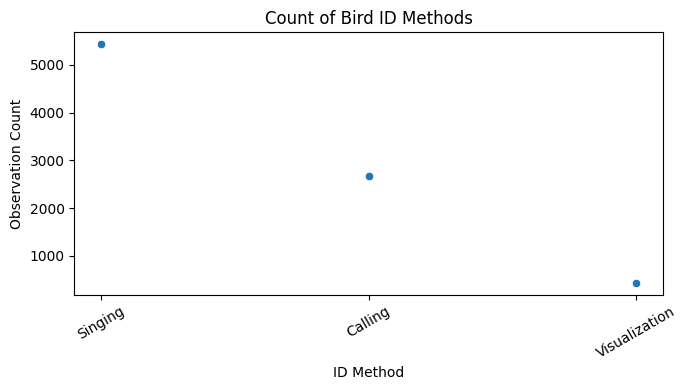

In [123]:
# Count occurrences of each ID method
id_method_counts = Forest['ID_Method'].value_counts().reset_index()
id_method_counts.columns = ['ID_Method', 'Count']
print(id_method_counts, '\n')


# Plotting the ID method counts
plt.figure(figsize=(7, 4))
sns.scatterplot(data=id_method_counts, x='ID_Method', y='Count', palette='muted')

# Customizing the plot
plt.title('Count of Bird ID Methods')
plt.xlabel('ID Method')
plt.ylabel('Observation Count')
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()

- Most Common Interval Lengths

  Interval_Length  Count
0       0-2.5 min   4410
1     2.5 - 5 min   1722
2     5 - 7.5 min   1295
3    7.5 - 10 min   1119 



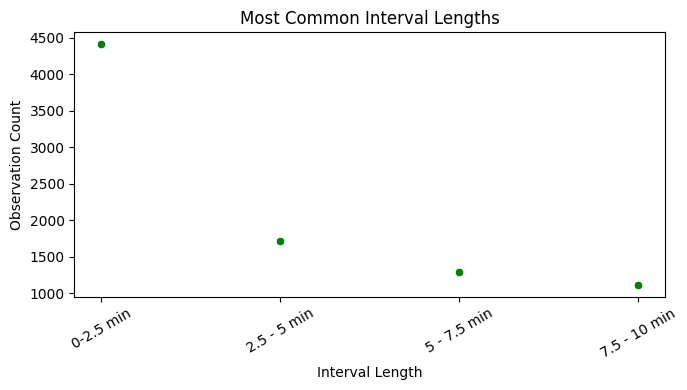

In [124]:
# Count occurrences of each Interval Length
interval_counts = Forest['Interval_Length'].value_counts().reset_index()
interval_counts.columns = ['Interval_Length', 'Count']
print(interval_counts, '\n')


# Plotting the Interval_Length counts
plt.figure(figsize=(7, 4))
sns.scatterplot(data=interval_counts, x='Interval_Length', y='Count', color='Green')

# Customizing the plot
plt.title('Most Common Interval Lengths')
plt.xlabel('Interval Length')
plt.ylabel('Observation Count')
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()

- Observation Counts by Activity Type and Interval:

In [125]:
#Most Common Bird ID Method & Interval:
combined_counts = Forest.groupby(['Interval_Length', 'ID_Method']).size().reset_index(name='Count')
combined_counts = combined_counts.sort_values(by='Count', ascending=False)
print(combined_counts.head(10))  # Show top 10 combinations

   Interval_Length      ID_Method  Count
1        0-2.5 min        Singing   3098
0        0-2.5 min        Calling   1186
4      2.5 - 5 min        Singing    986
7      5 - 7.5 min        Singing    730
3      2.5 - 5 min        Calling    644
10    7.5 - 10 min        Singing    617
6      5 - 7.5 min        Calling    458
9     7.5 - 10 min        Calling    389
2        0-2.5 min  Visualization    126
11    7.5 - 10 min  Visualization    113


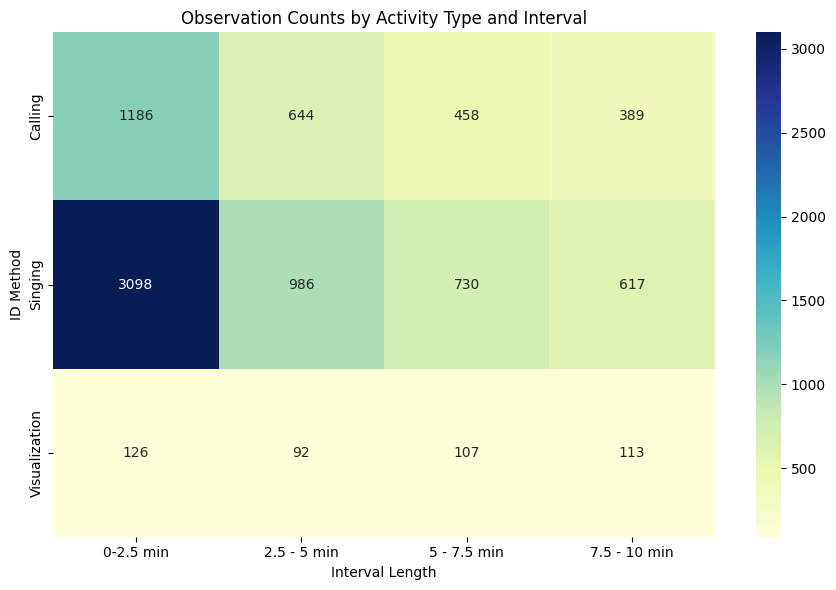

In [126]:
pivot_table = combined_counts.pivot(index='ID_Method', columns='Interval_Length', values='Count').fillna(0)

plt.figure(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Observation Counts by Activity Type and Interval')
plt.xlabel('Interval Length')
plt.ylabel('ID Method')
plt.tight_layout()
plt.show()

> *Sex Ratio: Analyze the Sex column to understand the male-to-female ratio for different species?*

- Forest Bird Sex Ratio Breakdown

In [127]:
forest_sex_ratio = Forest['Sex'].value_counts().reset_index()
# forest_sex_ratio

forest_sex_ratio.columns = ['Sex', 'Count']
forest_sex_ratio

,Sex,Count
0,Undetermined,8487
1,Male,59


In [128]:
fig = px.pie(forest_sex_ratio, names='Sex', values='Count', title='Sex Distribution in Forest Birds')
fig.show()

- Sex and Species Composition of Forest Birds:

In [129]:
species_sex_counts = Forest.groupby(['Scientific_Name', 'Sex']).size()
# species_sex_counts

species_sex_counts = species_sex_counts.reset_index()
# species_sex_counts

species_sex_counts.columns = ['Scientific_Name', 'Sex', 'Count']
species_sex_counts

species_sex_counts.sort_values(by = 'Count', ascending= False)

,Scientific_Name,Sex,Count
126,Vireo olivaceus,Undetermined,694
115,Thryothorus ludovicianus,Undetermined,646
17,Cardinalis cardinalis,Undetermined,570
9,Baeolophus bicolor,Undetermined,541
26,Contopus virens,Undetermined,486
36,Empidonax virescens,Undetermined,436
52,Melanerpes carolinus,Undetermined,396
83,Polioptila caerulea,Undetermined,310
86,Seiurus aurocapillus,Undetermined,303
119,Turdus migratorius,Undetermined,292


In [130]:
fig = px.sunburst(species_sex_counts, path=['Sex','Scientific_Name'], values='Count',
                  title='Sex and Species Distribution of Forest Birds')
fig.show()

**4. Environmental Conditions:**

> *Weather Correlation: Explore how Temperature, Humidity, Sky, and Wind impact observations, such as the number of birds or their distances?*

- Weather Factors & Bird Observations:

In [131]:
df = Forest.loc[:,['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name','Distance']]
df.head()

,Temperature,Humidity,Sky,Wind,Common_Name,Distance
0,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,Eastern Towhee,<= 50 Meters
1,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,White-breasted Nuthatch,<= 50 Meters
2,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,Red-bellied Woodpecker,50 - 100 Meters
3,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,Orchard Oriole,<= 50 Meters
4,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,Northern Mockingbird,<= 50 Meters


In [132]:
or_en = OrdinalEncoder()      

df['Common_Name'] = or_en.fit_transform(df[['Common_Name']])
df['Sky'] = or_en.fit_transform(df[['Sky']])
df['Wind'] = or_en.fit_transform(df[['Wind']])
df['Distance'] = or_en.fit_transform(df[['Distance']])
df.head()

,Temperature,Humidity,Sky,Wind,Common_Name,Distance
0,19.9,79.400002,1.0,0.0,38.0,2.0
1,19.9,79.400002,1.0,0.0,96.0,2.0
2,19.9,79.400002,1.0,0.0,76.0,1.0
3,19.9,79.400002,1.0,0.0,69.0,2.0
4,19.9,79.400002,1.0,0.0,65.0,2.0


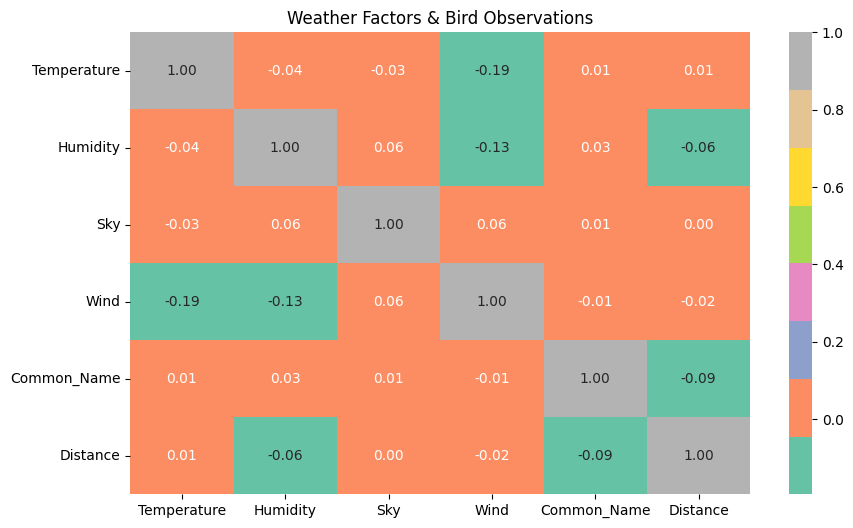

In [133]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="Set2", fmt=".2f")
plt.title("Weather Factors & Bird Observations")
plt.show()

- Distribution plot of Temperature by Distance:

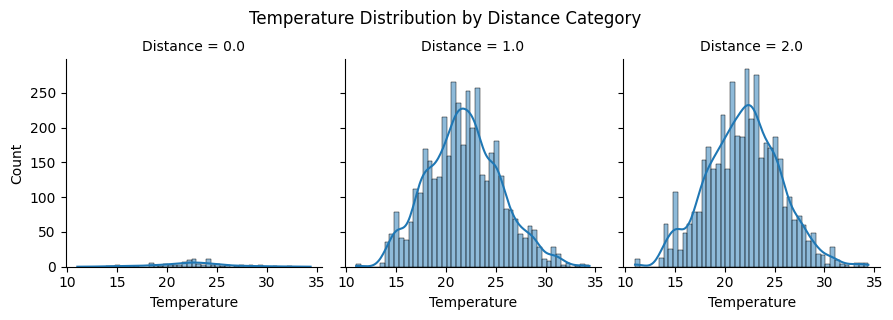

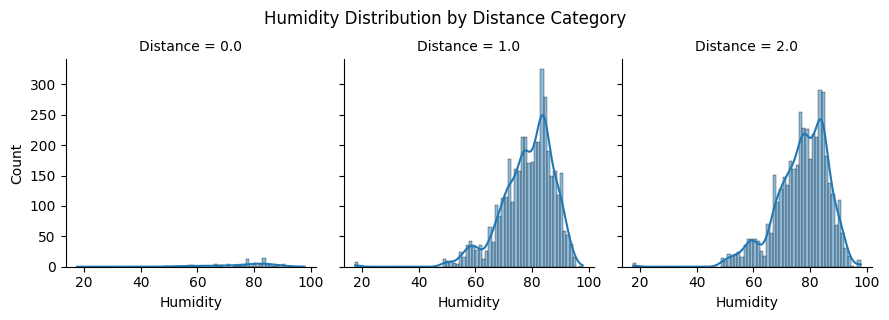

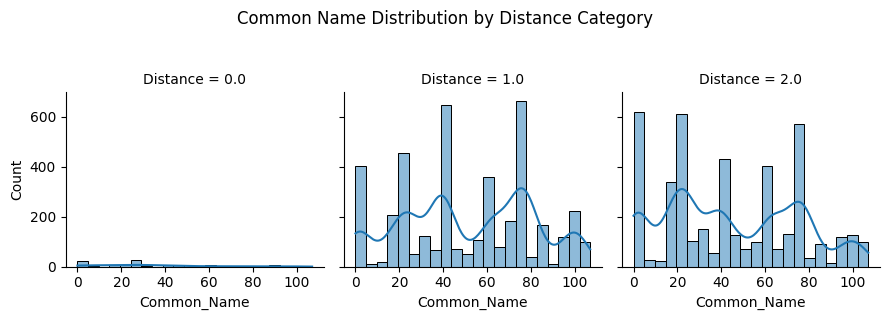

In [134]:
# Create distribution plots of Temperature, one for each Distance category
sns.displot(data=df,x='Temperature',col='Distance', # Creates one subplot per distance category
    kde=True,          # Adds a smooth distribution curve
    height=3,aspect=1)
plt.suptitle('Temperature Distribution by Distance Category', y=1.05)


sns.displot(data=df,x='Humidity',col='Distance',kde=True,height=3,aspect=1)
plt.suptitle('Humidity Distribution by Distance Category', y=1.05)

sns.displot(data=df,x='Common_Name',col='Distance',kde=True,height=3,aspect=1)
plt.suptitle('Common Name Distribution by Distance Category', y=1.05)

plt.tight_layout()
plt.show()

- Distribution plot of Temperature by Sky:

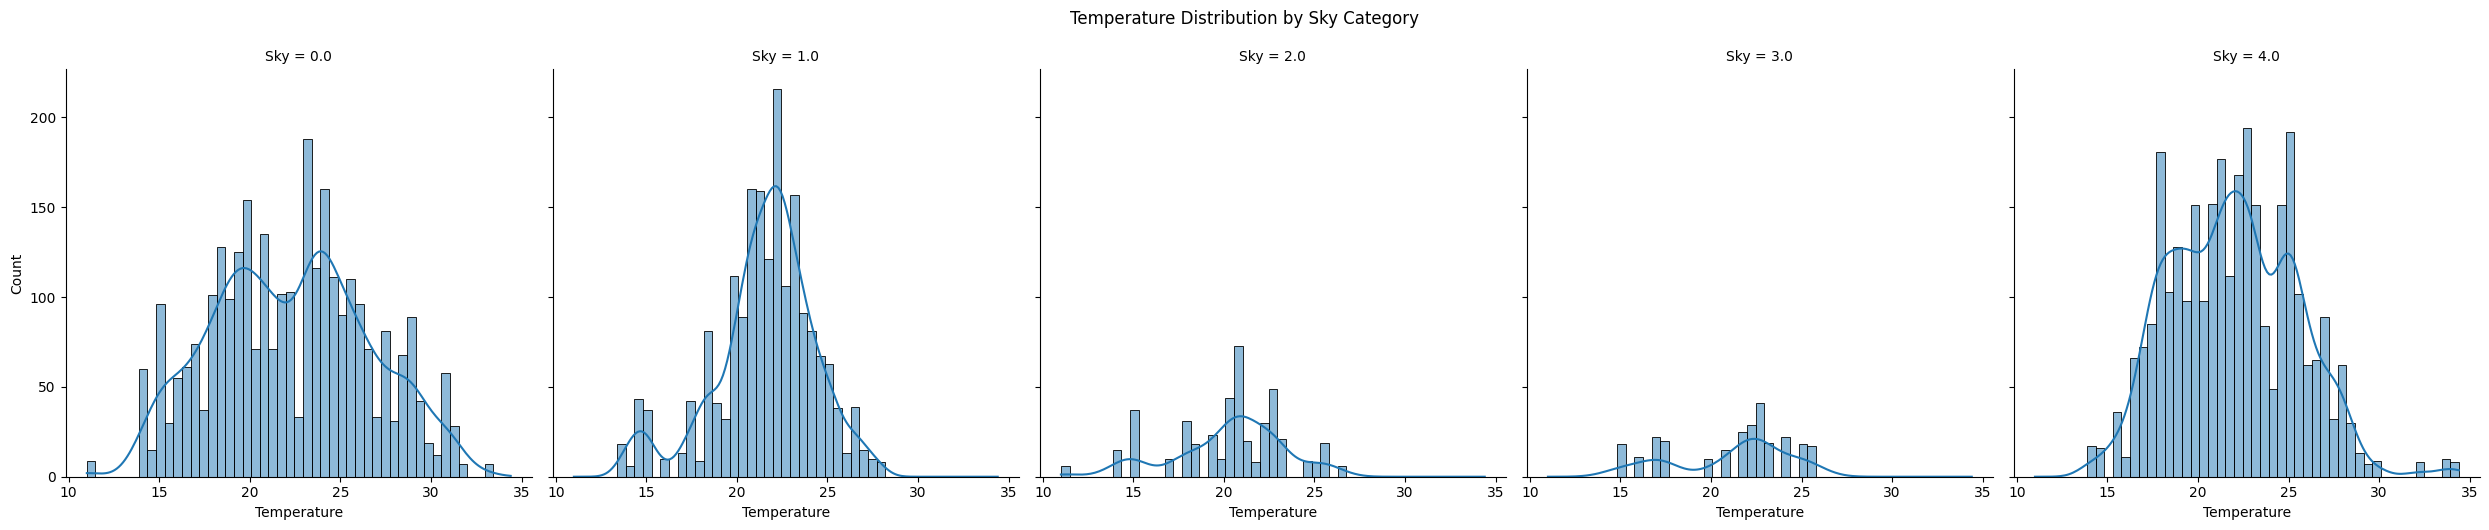

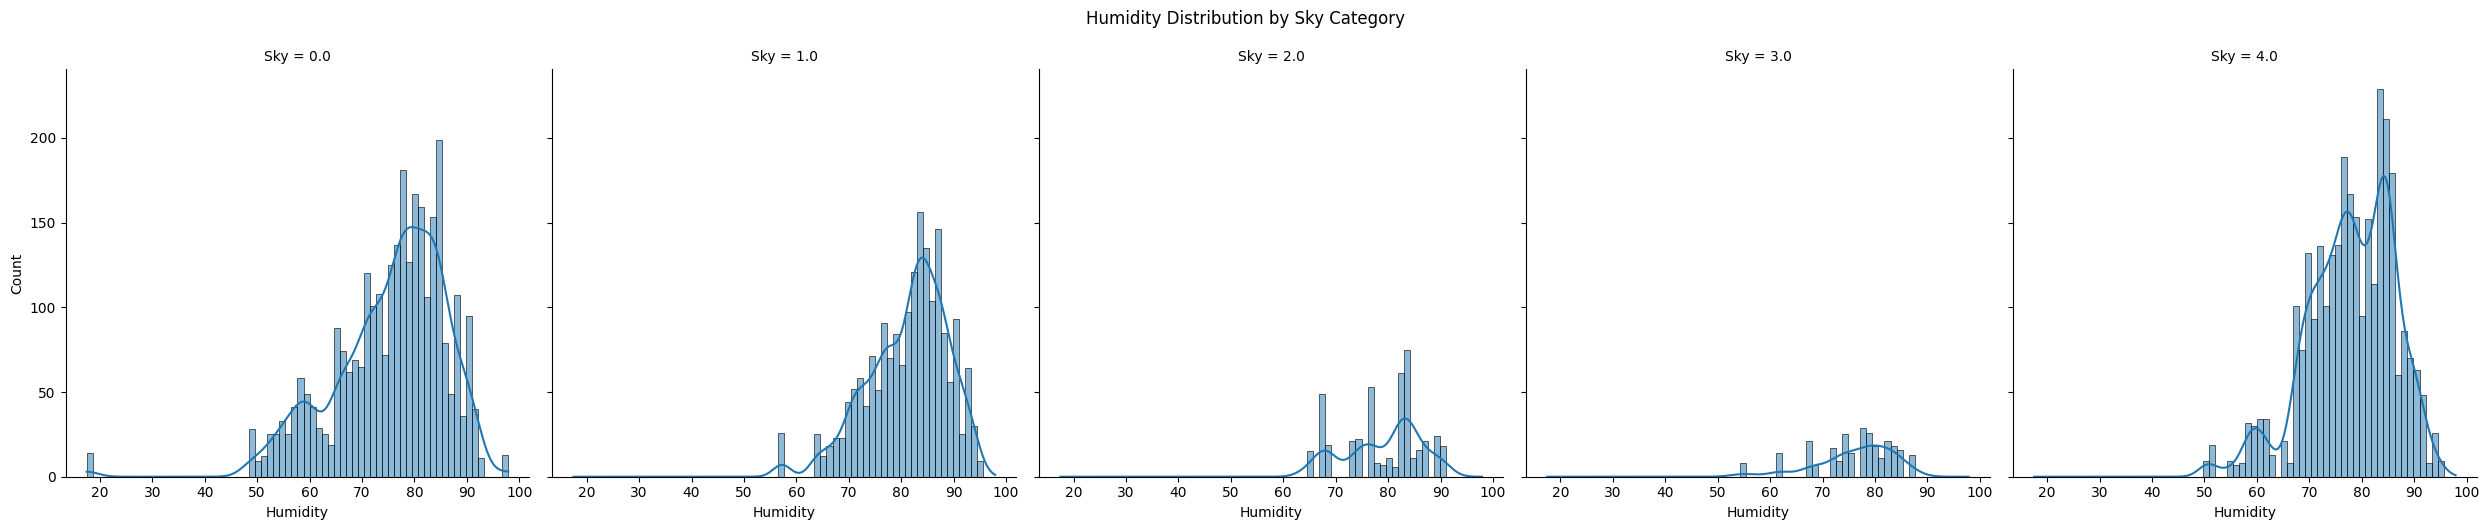

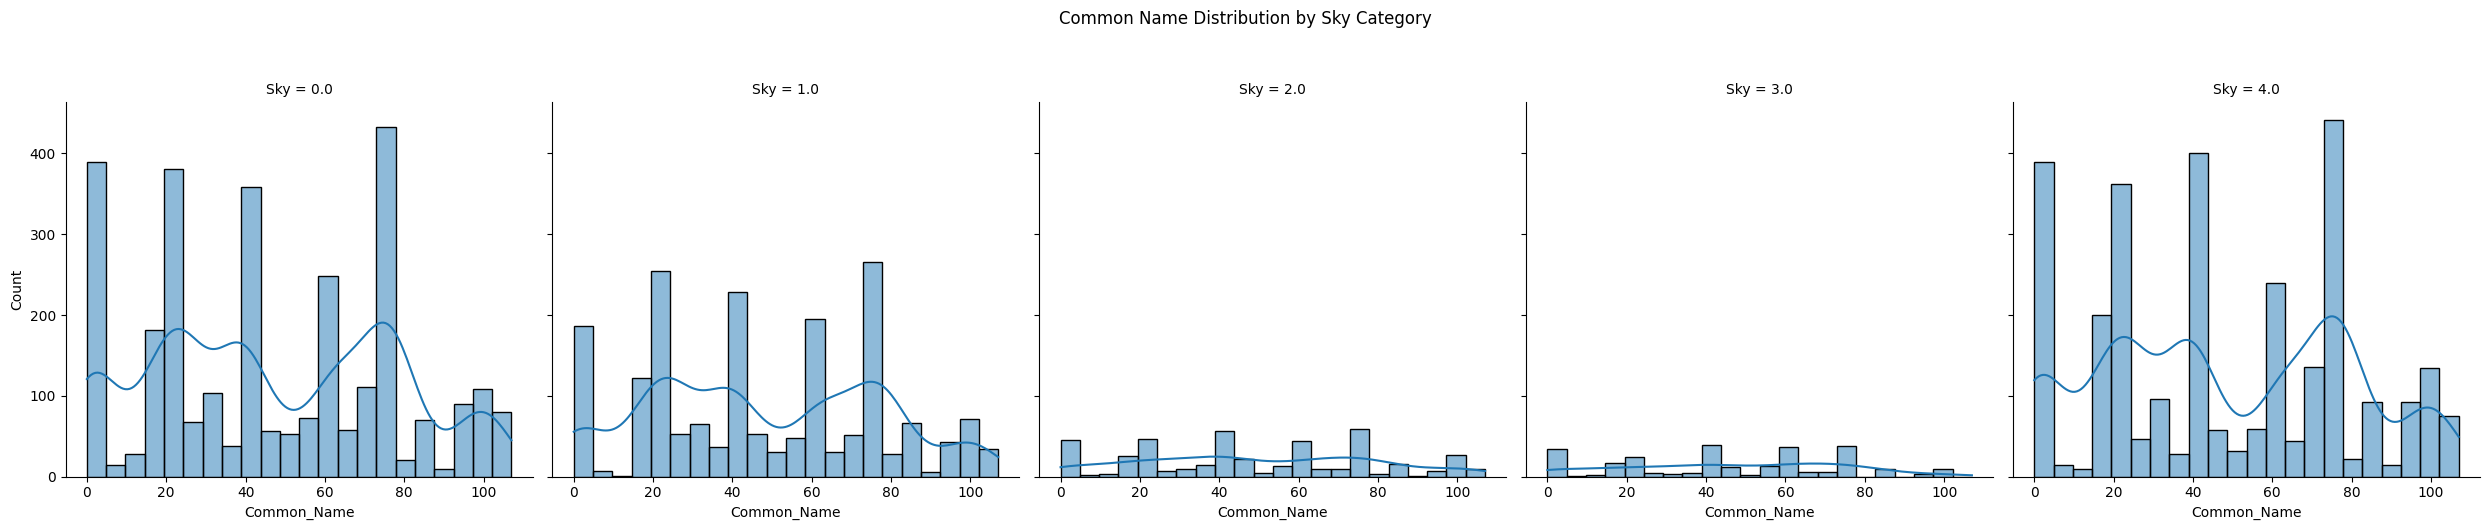

In [135]:
sns.displot(data = df,
            x='Temperature', #x -> numerical values
            col='Sky', #col -> is like category ()
            kde=True)

plt.suptitle('Temperature Distribution by Sky Category', y=1.05)

sns.displot(data = df,
            x='Humidity', #x -> numerical values
            col='Sky', #col -> is like category ()
            kde=True)

plt.suptitle('Humidity Distribution by Sky Category', y=1.05)

sns.displot(data = df,
            x='Common_Name', #x -> numerical values
            col='Sky', #col -> is like category ()
            kde=True)

plt.suptitle('Common Name Distribution by Sky Category', y=1.05)
plt.tight_layout()
plt.show()
plt.show()

- Distribution plot of Temperature by Wind:

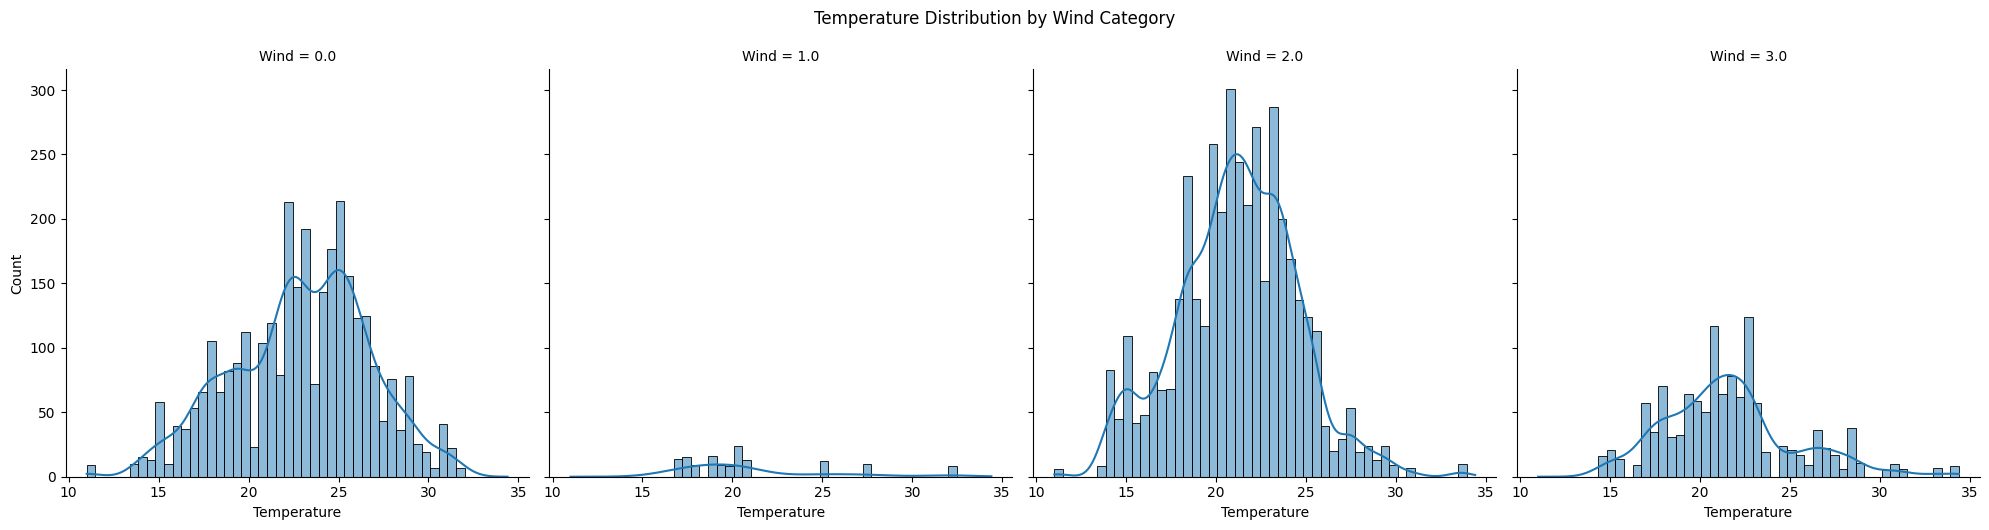

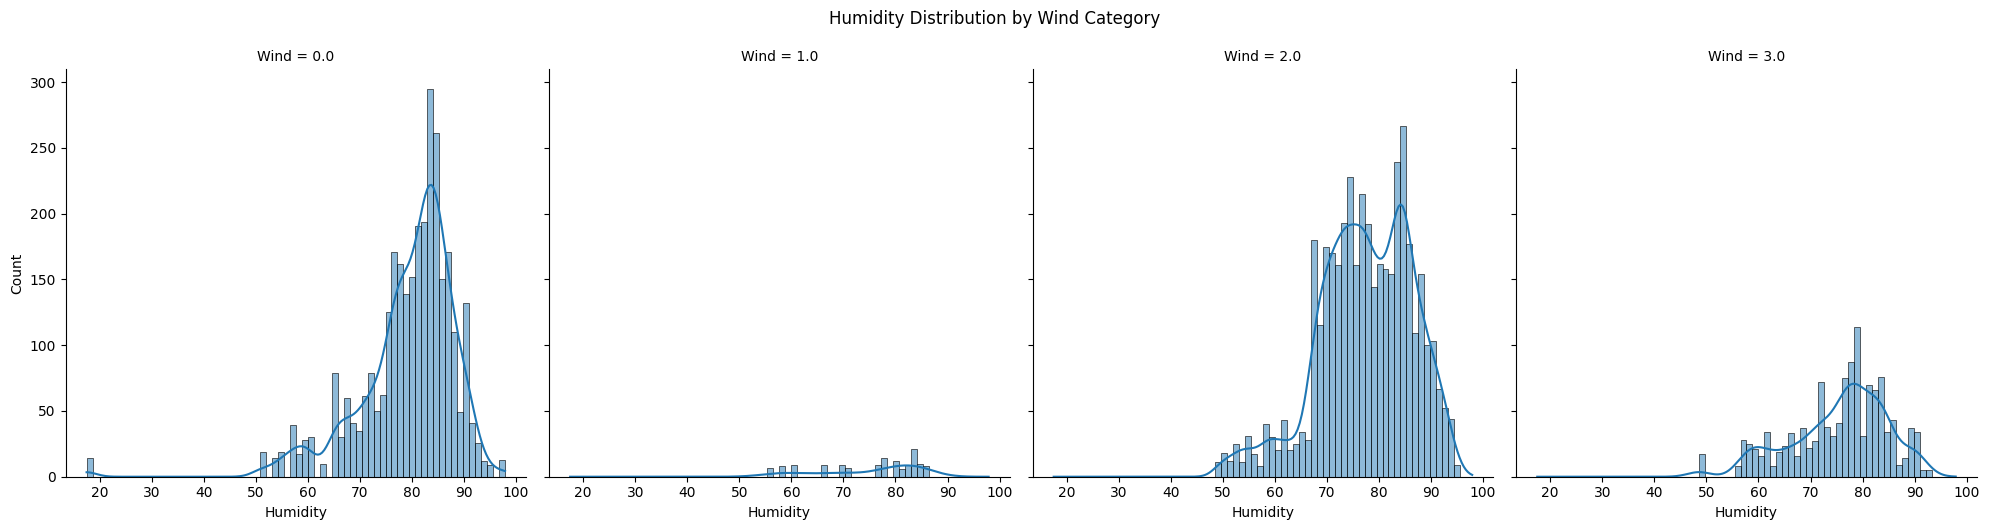

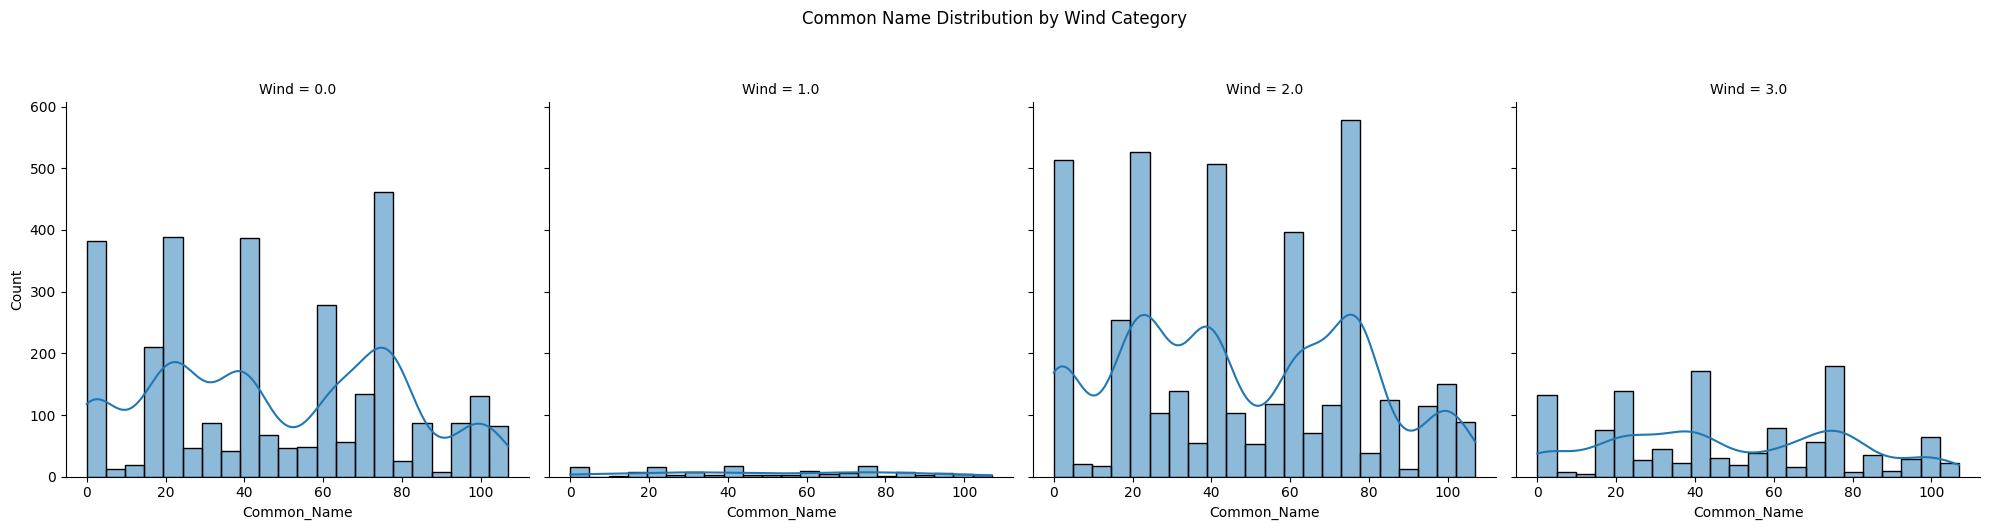

In [136]:
sns.displot(data = df, x='Temperature',col='Wind',kde=True)
plt.suptitle('Temperature Distribution by Wind Category', y=1.05)

sns.displot(data = df, x='Humidity',col='Wind',kde=True)
plt.suptitle('Humidity Distribution by Wind Category', y=1.05)

sns.displot(data = df, x='Common_Name',col='Wind',kde=True)
plt.suptitle('Common Name Distribution by Wind Category', y=1.05)
plt.tight_layout()
plt.show()

>*Disturbance Effect: Assess the impact of Disturbance (e.g., slight effect) on bird sightings?*

In [137]:
Forest['Disturbance'].unique()

array(['No effect on count', 'Moderate effect on count',
       'Slight effect on count', 'Serious effect on count'], dtype=object)

- Proportion of Bird Sightings by Disturbance Type:

In [138]:
Forest_Disturbance = Forest['Disturbance'].value_counts().reset_index()
Forest_Disturbance

Forest_Disturbance.columns = ['Disturbance','Disturbance_Count']
Forest_Disturbance

,Disturbance,Disturbance_Count
0,No effect on count,4853
1,Slight effect on count,2691
2,Moderate effect on count,811
3,Serious effect on count,191


In [139]:
fig = go.Figure(
    go.Pie(
        labels=Forest_Disturbance['Disturbance'],
        values=Forest_Disturbance['Disturbance_Count'],
        hole=0.6,
        marker=dict(colors=px.colors.qualitative.Set2)
    )
)

fig.update_layout(
    title_text='Proportion of Bird Sightings by Disturbance Type',
    annotations=[dict(text='Disturbance', x=0.5, y=0.5, font_size=14, showarrow=False)]
)

fig.show()

**5. Distance and Behavior**

>*Distance Analysis: Evaluate the Distance column to identify species typically observed closer or farther from the observer?*

In [140]:
Forest['Distance'].unique()

array(['<= 50 Meters', '50 - 100 Meters', '0 Meters'], dtype=object)

In [141]:
Forest['Observer'].unique()

array(['Elizabeth Oswald', 'Kimberly Serno', 'Brian Swimelar'],
      dtype=object)

In [142]:
distance_species_counts = Forest.groupby(['Observer','Distance','Common_Name']).size().reset_index(name='Obeserver_Distamce_Count')
distance_species_counts

,Observer,Distance,Common_Name,Obeserver_Distamce_Count
0,Brian Swimelar,0 Meters,American Crow,6
1,Brian Swimelar,0 Meters,American Goldfinch,2
2,Brian Swimelar,0 Meters,American Robin,2
3,Brian Swimelar,0 Meters,Barn Swallow,2
4,Brian Swimelar,0 Meters,Blue Jay,5
5,Brian Swimelar,0 Meters,Canada Goose,2
6,Brian Swimelar,0 Meters,Cedar Waxwing,2
7,Brian Swimelar,0 Meters,Chimney Swift,1
8,Brian Swimelar,0 Meters,Common Grackle,9
9,Brian Swimelar,0 Meters,Fish Crow,1


- Bird Species Observation by Distance and Observer:

In [143]:
fig = px.bar(distance_species_counts,
    x='Common_Name',
    y='Obeserver_Distamce_Count',
    color='Distance',
    facet_col='Observer',
    title='Bird Species Observation by Distance and Observer',
    labels={'Common_Name': 'Species', 'Count': 'Observation Count'},
    height=600
)
fig.show()


>*Flyover Frequency: Examine the Flyover_Observed column to detect trends in bird behavior during observation?*

In [144]:
Forest['Flyover_Observed'].unique()

array([False,  True])

- Frequency of Bird Flyovers:

In [145]:
flyover_counts = Forest['Flyover_Observed'].value_counts()
flyover_counts = flyover_counts.reset_index()
flyover_counts

,Flyover_Observed,count
0,False,8454
1,True,92


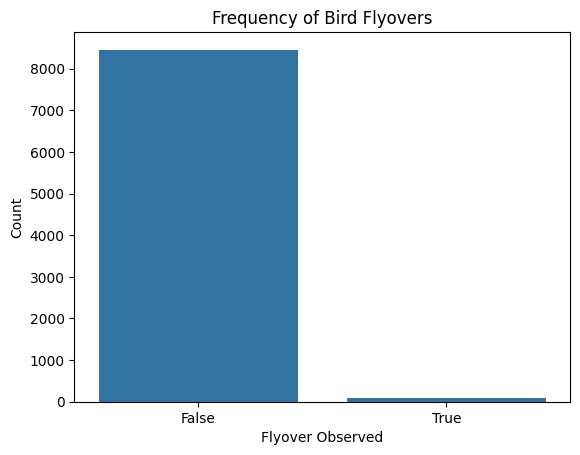

In [146]:
sns.countplot(data=Forest, x='Flyover_Observed')
plt.title('Frequency of Bird Flyovers')
plt.xlabel('Flyover Observed')
plt.ylabel('Count')
plt.show()

- Flyover by Species:

In [147]:
flyover_by_species = Forest.groupby(['Common_Name', 'Flyover_Observed']).size().reset_index(name='Count')
flyover_by_species

,Common_Name,Flyover_Observed,Count
0,Acadian Flycatcher,False,436
1,American Crow,False,129
2,American Crow,True,13
3,American Goldfinch,False,141
4,American Goldfinch,True,6
5,American Redstart,False,25
6,American Robin,False,292
7,American Robin,True,2
8,Baltimore Oriole,False,20
9,Barn Swallow,True,2


In [148]:
fig = px.bar(flyover_by_species, x='Common_Name', y='Count', color='Flyover_Observed',
             title='Flyover Observations by Species',
             labels={'Common_Name': 'Species', 'Count': 'Observations'},
             barmode='group')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

- Flyovers vs. Weather Conditions

- - Temperature Distribution by Flyover Observation:

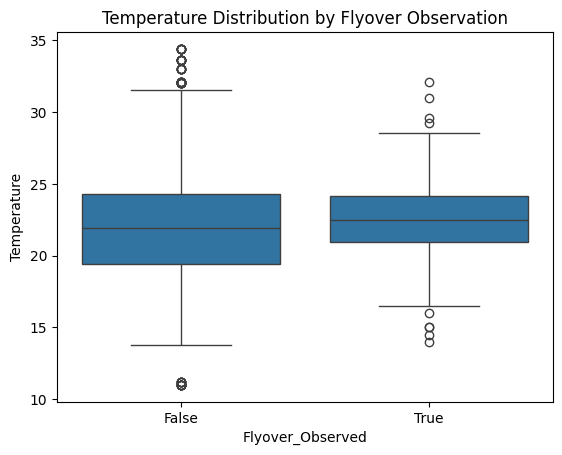

In [149]:
sns.boxplot(data=Forest, x='Flyover_Observed', y='Temperature')
plt.title('Temperature Distribution by Flyover Observation')
plt.show()

- - Flyover Observation Frequency by Sky Condition:

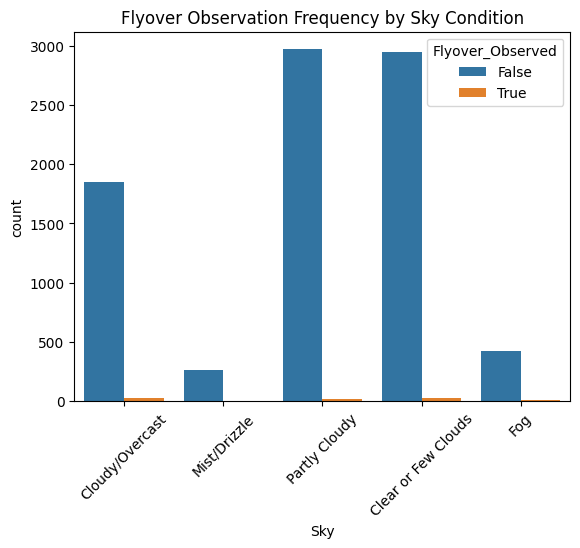

In [150]:
sns.countplot(data=Forest, x='Sky', hue='Flyover_Observed')
plt.title('Flyover Observation Frequency by Sky Condition')
plt.xticks(rotation=45)
plt.show()

- - Flyover Observations Over Time:

In [151]:
flyover_over_time = Forest.groupby(['Date', 'Flyover_Observed']).size().reset_index(name='Count')
fig = px.line(flyover_over_time, x='Date', y='Count', color='Flyover_Observed',
              title='Flyover Observations Over Time')
fig.show()

**6. Observer Trends**

>*Observer Bias: Analyze data by Observer to check if specific individuals report more observations or certain species?*

- - Number of Observations by Each Observer

C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\2170806545.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




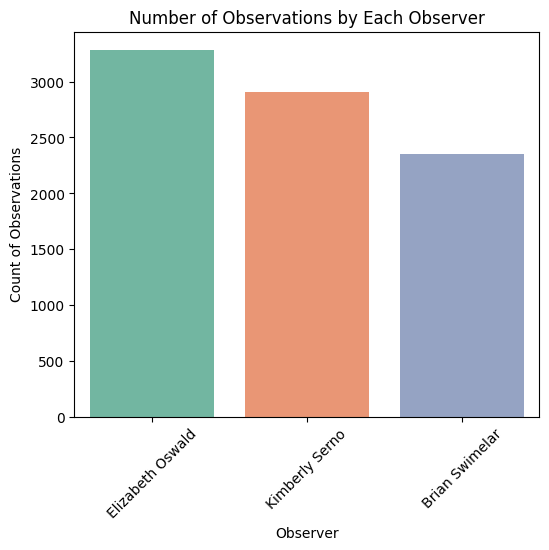

In [152]:
plt.figure(figsize=(6, 5))
sns.countplot(data=Forest, x="Observer", order=Forest["Observer"].value_counts().index, palette="Set2")

plt.title("Number of Observations by Each Observer")
plt.xlabel("Observer")
plt.ylabel("Count of Observations")
plt.xticks(rotation=45)
plt.show()

- - Species Diversity per Observer:

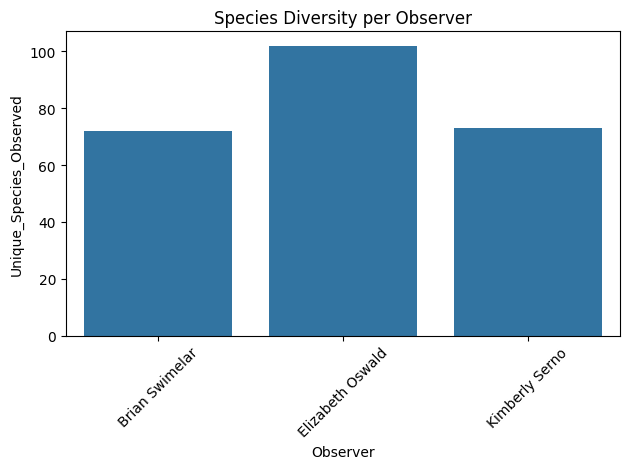

In [153]:
species_per_observer = Forest.groupby('Observer')['Common_Name'].nunique().reset_index()
species_per_observer.columns = ['Observer', 'Unique_Species_Observed']

sns.barplot(data=species_per_observer, x='Observer', y='Unique_Species_Observed')
plt.title('Species Diversity per Observer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- - Species Observed by Each Observer

C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\1806869035.py:9: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



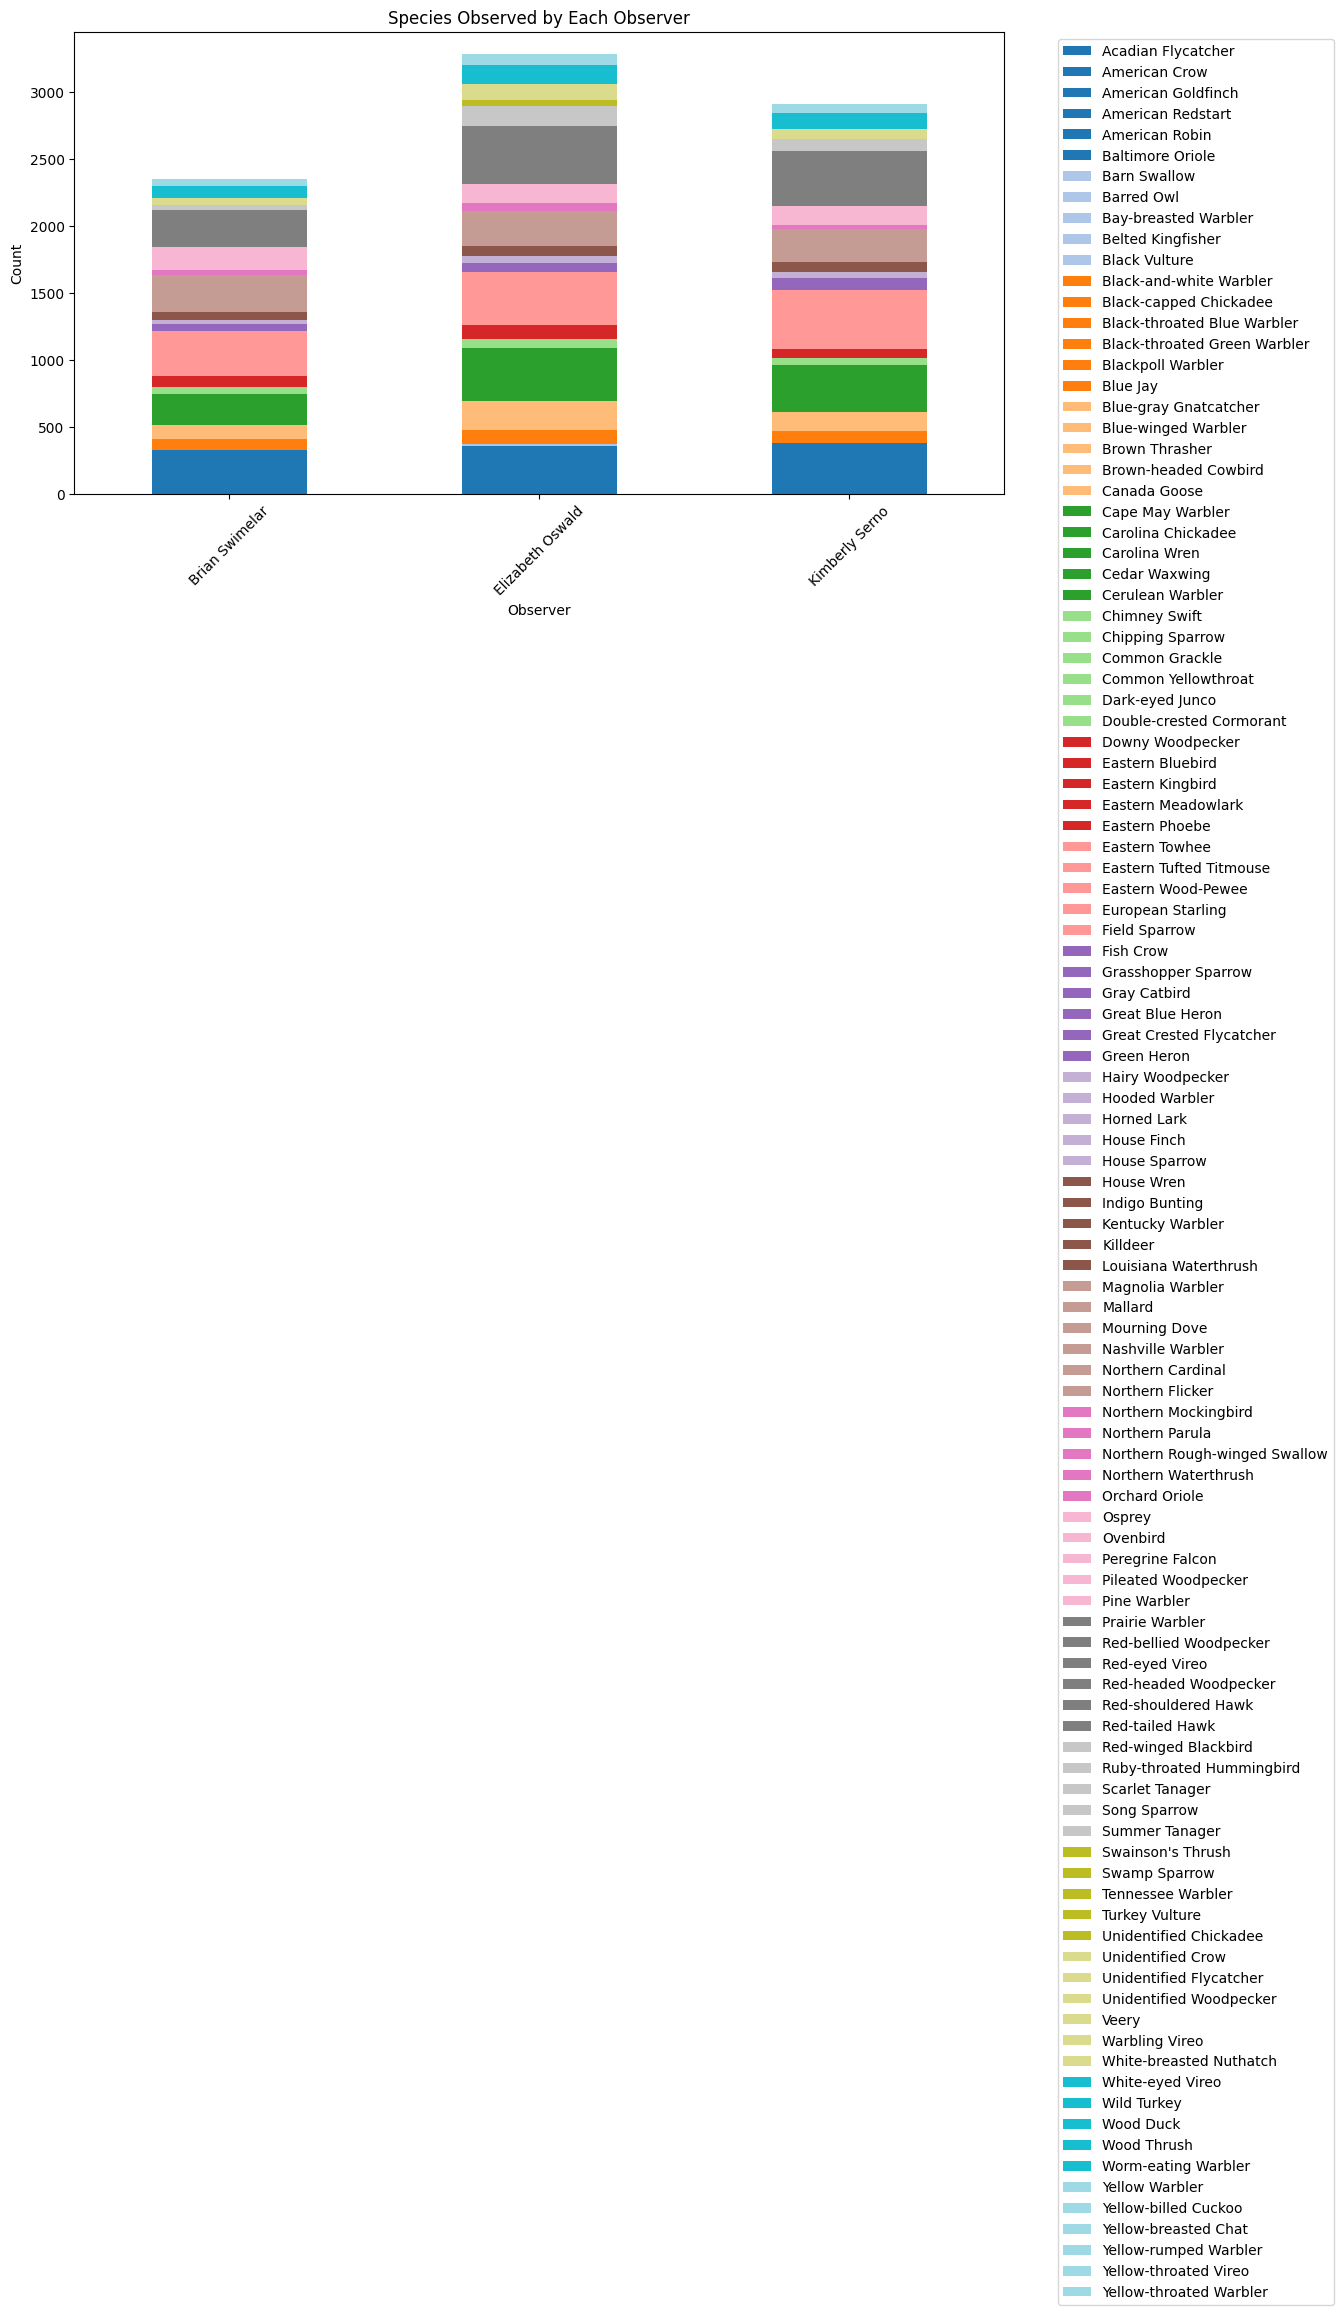

In [154]:
obs_species_counts = Forest.groupby(['Observer', 'Common_Name']).size().reset_index(name='Count')
pivot_df = obs_species_counts.pivot(index='Observer', columns='Common_Name', values='Count').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Species Observed by Each Observer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


>*Visit Patterns: Evaluate the Visit column to see how repeated visits affect species count or diversity?*

In [155]:
Forest['Visit'].unique()

array([1, 2])

In [156]:
visit_counts = Forest.groupby('Visit').size().reset_index(name='Total_Observations')
visit_counts

,Visit,Total_Observations
0,1,4382
1,2,4164


C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\1483679357.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




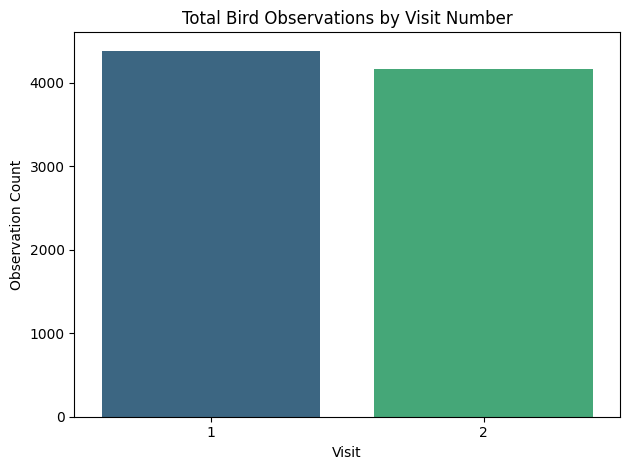

In [157]:
sns.barplot(data=visit_counts, x='Visit', y='Total_Observations', palette='viridis')
plt.title('Total Bird Observations by Visit Number')
plt.ylabel('Observation Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**7. Conservation Insights**

>*Watchlist Trends: Use the PIF_Watchlist_Status and Regional_Stewardship_Status to identify trends in species that are at risk or require conservation focus?*

- PIF_Watchlist_Status

In [158]:
# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = Forest["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]
watchlist_counts

,Status,Count
0,False,8208
1,True,338


- Regional_Stewardship_Status

In [159]:
# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = Forest["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]
stewardship_counts

,Status,Count
0,False,6101
1,True,2445


- PIF_Watchlist_Status and Regional_Stewardship_Status Trends:

C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\3508456335.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\3508456335.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




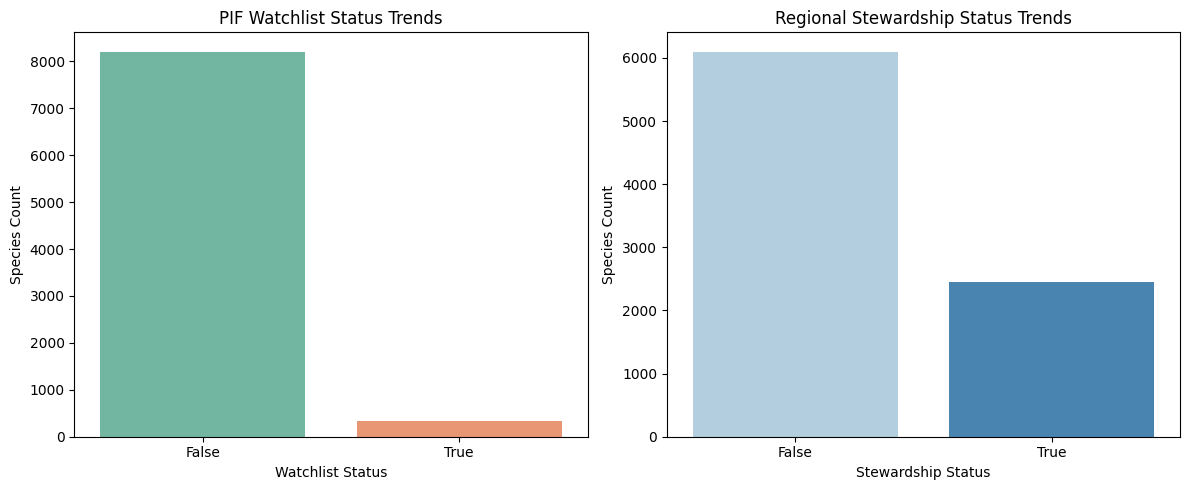

In [160]:
# Plot PIF Watchlist Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Set2")
plt.title("PIF Watchlist Status Trends")
plt.xlabel("Watchlist Status")
plt.ylabel("Species Count")

# Plot Regional Stewardship Trends
plt.subplot(1, 2, 2)
sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")
plt.title("Regional Stewardship Status Trends")
plt.xlabel("Stewardship Status")
plt.ylabel("Species Count")

plt.tight_layout()
plt.show()

>*AOU Code Patterns: Study the distribution of species based on their AOU_Code to correlate with regional or national conservation priorities?*

In [161]:
# Count the occurrences of each AOU Code
AOU_Code_Counts = Forest["AOU_Code"].value_counts().reset_index()
AOU_Code_Counts.columns = ["AOU_Code", "Count"]
AOU_Code_Counts.head()

,AOU_Code,Count
0,REVI,694
1,CARW,646
2,NOCA,595
3,ETTI,541
4,EAWP,486


- Top Species Observed by AOU Code:

C:\Users\dhars\AppData\Local\Temp\ipykernel_4364\1775593456.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




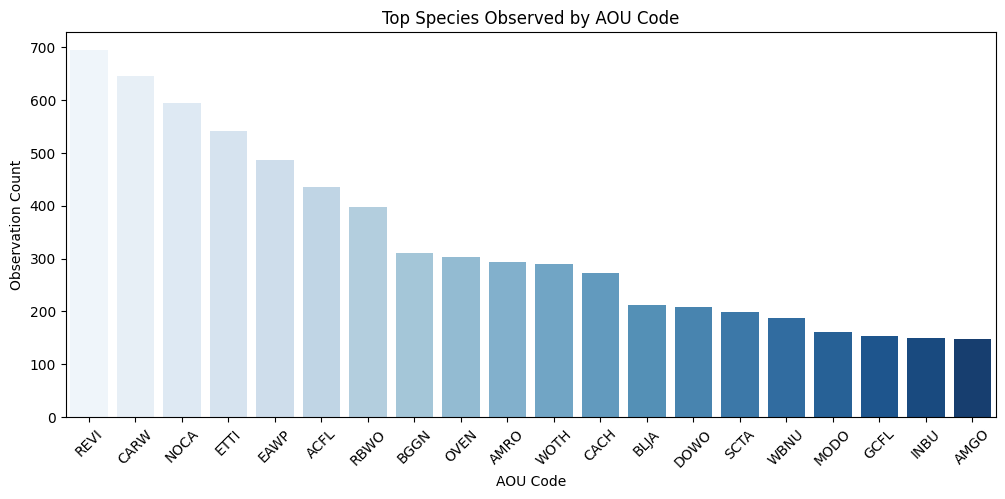

In [162]:
plt.figure(figsize=(12, 5))
sns.barplot(data=AOU_Code_Counts.head(20), x="AOU_Code", y="Count", palette="Blues")
plt.title("Top Species Observed by AOU Code")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()

- EDA DataSet:

In [163]:
# Create the directory if it doesn't exist
output_dir = 'C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project2/Bird_Species_Observation/DataSet/CleanDataSet'
os.makedirs(output_dir, exist_ok=True)

# Now save the file
Forest.to_csv(os.path.join(output_dir, 'EDA_Forest_DataSet.csv'), index=False)

In [164]:
EDA_Forest_DataSet=pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project2/Bird_Species_Observation/DataSet/CleanDataSet/EDA_Forest_DataSet.csv")
EDA_Forest_DataSet.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Start_Timestamp,End_Timestamp,Start_Hour,End_Hour,Start_Time_Only,End_Time_Only,Duration,Duration_Hours,Month,Dates,WeekDay_Name,iso,Season
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Undetermined,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Undetermined,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,2018-05-22 06:19:00,2018-05-22 06:29:00,6,6,06:19:00,06:29:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
